**1. Installing and Importing Dependencies**

In [18]:
import cv2
import mediapipe as mp
import numpy as np
import os
from matplotlib import pyplot as plt
import time

**2. Key Points using Holistic**

In [19]:
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

In [20]:
def mediapipe_detection(image, model):

    # Convert the BGR image to RGB before processing
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Image is no longer writeable
    image.flags.writeable= False 

    # Make prediction
    results = model.process(image) 

    # Image is now writeable
    image.flags.writeable = True 

    # Convert back to BGR
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) 
    return image, results

In [21]:
def draw_landmarks (image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION)
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

In [22]:
def draw_styled_landmarks (image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION,
    mp_drawing. DrawingSpec (color=(80,110,10), thickness=1, circle_radius=1),
    mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
    )
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic. POSE_CONNECTIONS,
    mp_drawing. DrawingSpec (color=(80,22,10), thickness=2, circle_radius=4),
    mp_drawing. DrawingSpec (color=(80,44,121), thickness=2, circle_radius=2)
    )

    # Draw Left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic. HAND_CONNECTIONS,
    mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
    mp_drawing.DrawingSpec (color= (121,44,250), thickness=2, circle_radius=2)
    )

    # Draw right hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
    mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
    mp_drawing. DrawingSpec (color=(245,66,230), thickness=2, circle_radius=2)
    )

In [24]:

# This video path is for the video that I have in my local machine
# You can change the path to the video that you have in your local machine
# This video contains the word "again" in sign language

cap = cv2.VideoCapture('Videos_Data/again/again_0.mp4')


with mp_holistic.Holistic(min_detection_confidence=0.9, min_tracking_confidence=0.9) as holistic:
    while cap.isOpened():
    # Read feed
        ret, frame = cap.read()

        txt = frame
        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)

        draw_styled_landmarks(image, results)

        cv2.imshow('OpenCV Feed - Sign Lang', image)
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

KeyboardInterrupt: 

In [25]:
len(results.face_landmarks.landmark)

468

In [26]:
frame

array([[[172, 185, 187],
        [169, 182, 185],
        [169, 182, 185],
        ...,
        [129, 145, 151],
        [132, 148, 154],
        [133, 150, 155]],

       [[172, 185, 187],
        [169, 182, 185],
        [169, 182, 185],
        ...,
        [129, 145, 151],
        [132, 148, 154],
        [133, 150, 155]],

       [[172, 185, 187],
        [171, 183, 186],
        [171, 183, 186],
        ...,
        [127, 144, 150],
        [131, 147, 153],
        [133, 150, 155]],

       ...,

       [[130, 140, 138],
        [130, 140, 138],
        [130, 140, 138],
        ...,
        [111, 129, 132],
        [110, 127, 131],
        [110, 127, 131]],

       [[130, 140, 138],
        [130, 140, 138],
        [130, 140, 138],
        ...,
        [111, 129, 132],
        [110, 127, 131],
        [110, 127, 131]],

       [[130, 140, 138],
        [130, 140, 138],
        [130, 140, 138],
        ...,
        [111, 129, 132],
        [110, 127, 131],
        [110, 127, 131]]

In [27]:
draw_styled_landmarks(frame, results)

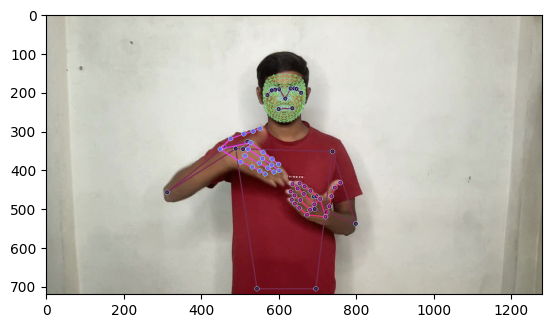

In [28]:
plt.imshow(cv2.cvtColor(txt, cv2.COLOR_BGR2RGB))

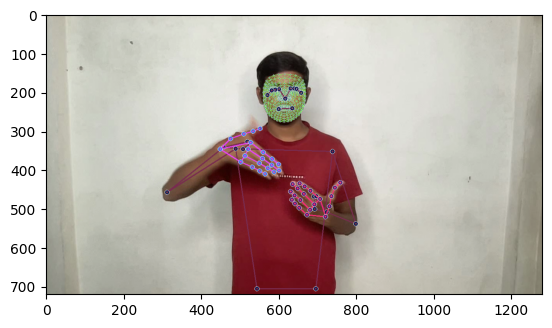

In [29]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

**3. Extract Keypoint Values**

In [30]:
# we will not use face landmarks as they will create noise in our model 

len(results.face_landmarks.landmark)

468

In [31]:
len(results.left_hand_landmarks.landmark)

21

In [32]:
len(results.right_hand_landmarks.landmark)

21

In [33]:
len(results.pose_landmarks.landmark)

33

In [34]:
results.right_hand_landmarks.landmark

[x: 0.35093492
y: 0.48281777
z: 2.9506555e-07
, x: 0.3726506
y: 0.4457378
z: -0.0024749837
, x: 0.39864045
y: 0.42796037
z: -0.0056300955
, x: 0.41741502
y: 0.41844082
z: -0.0088001145
, x: 0.43171704
y: 0.40838313
z: -0.012145993
, x: 0.41282833
y: 0.4586675
z: -0.00797252
, x: 0.43823978
y: 0.49430662
z: -0.014816167
, x: 0.45586145
y: 0.5175898
z: -0.020508612
, x: 0.4691214
y: 0.5368476
z: -0.02372619
, x: 0.40760702
y: 0.48274213
z: -0.010672281
, x: 0.43623045
y: 0.5161195
z: -0.014604354
, x: 0.4554562
y: 0.539761
z: -0.017634729
, x: 0.46976554
y: 0.55856943
z: -0.020097705
, x: 0.4009158
y: 0.50674313
z: -0.013429732
, x: 0.42985526
y: 0.5328578
z: -0.016599378
, x: 0.447064
y: 0.5510473
z: -0.01782008
, x: 0.45944434
y: 0.5641867
z: -0.018710537
, x: 0.39289984
y: 0.52821755
z: -0.01642872
, x: 0.4163613
y: 0.54624254
z: -0.018105632
, x: 0.43084186
y: 0.5603325
z: -0.017097397
, x: 0.44167542
y: 0.5719506
z: -0.01617023
]

In [35]:
results.face_landmarks.landmark

[x: 0.48032126
y: 0.32496926
z: -0.013107238
, x: 0.4807748
y: 0.30151108
z: -0.02053434
, x: 0.4806154
y: 0.31019256
z: -0.011373379
, x: 0.47771466
y: 0.28214213
z: -0.014144132
, x: 0.4808502
y: 0.29477072
z: -0.021482822
, x: 0.48091713
y: 0.2869256
z: -0.019485421
, x: 0.48104537
y: 0.26929748
z: -0.007989717
, x: 0.45350605
y: 0.27213573
z: 0.007547474
, x: 0.48111275
y: 0.25645095
z: -0.0048682974
, x: 0.48119503
y: 0.24792384
z: -0.005260378
, x: 0.4814204
y: 0.21479516
z: 0.0012149906
, x: 0.48028168
y: 0.32834366
z: -0.012882586
, x: 0.48026702
y: 0.33131993
z: -0.011662076
, x: 0.48029912
y: 0.33291715
z: -0.010031849
, x: 0.48032117
y: 0.33614182
z: -0.0096953325
, x: 0.4802998
y: 0.33899453
z: -0.010387307
, x: 0.48025015
y: 0.34281883
z: -0.01111595
, x: 0.48022833
y: 0.3471351
z: -0.010319175
, x: 0.4802013
y: 0.35486397
z: -0.006163676
, x: 0.48068553
y: 0.30535924
z: -0.01876877
, x: 0.47758043
y: 0.3058001
z: -0.013608073
, x: 0.4406886
y: 0.25088704
z: 0.027769074
, 

In [36]:
# This function will extract the required information from the landmarks and 
# return it as a numpy array. The function will take the results as input and 
# will return a numpy array with the following information:

def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    
    # Face landmarks will not be used as they will create noise in our model
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

: 